## Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Importing the required lib

In [5]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
df = pd.read_csv('SARS_coronavirus_3C_proteinase_bioactivity_data2_class_pIC50.csv')

In [7]:
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
1,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
2,5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
3,7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
4,8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...
72,81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
73,82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
74,83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
75,84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


## Frequency plot of the two bioactivity classes

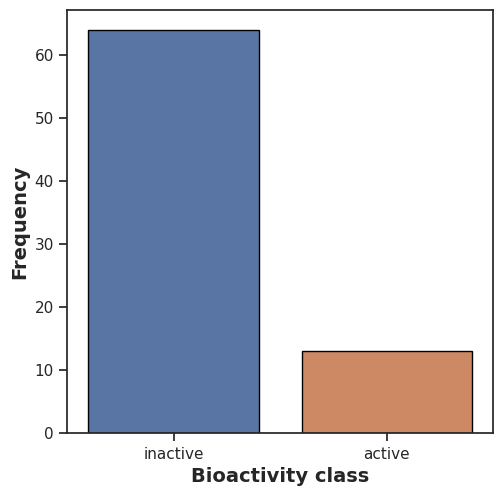

In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Scatter plot of MW vs logp (Molecular Weight and log p is the solubility)

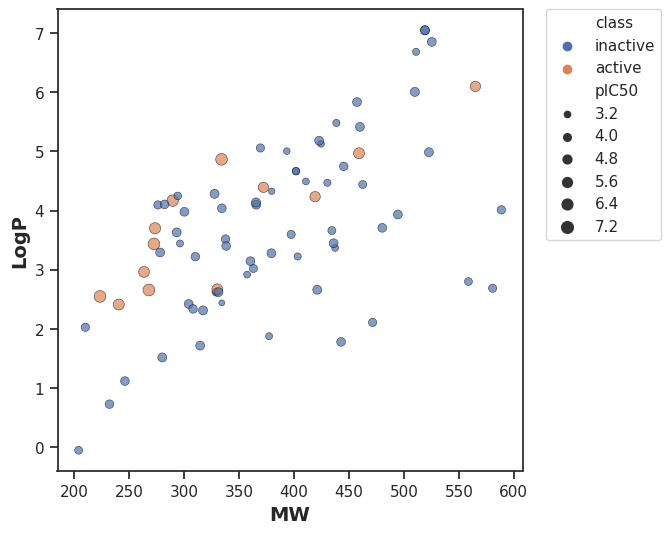

In [10]:
plt.figure(figsize=(6,6))

sns.scatterplot(x='MW', y='LogP', data=df, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## BoxPlot for pIC Values

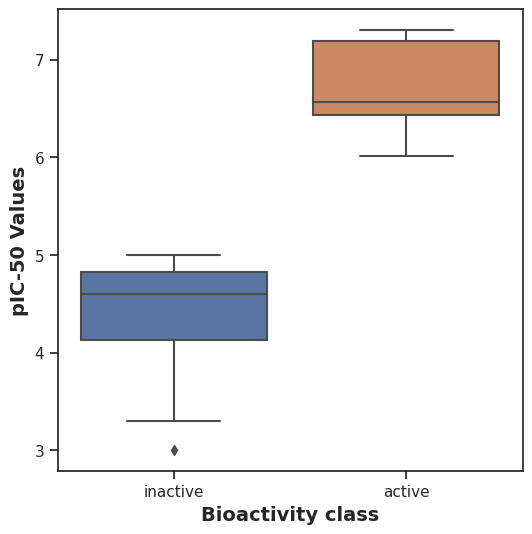

In [11]:
plt.figure(figsize = (6,6))

sns.boxplot(x='class', y = 'pIC50', data = df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC-50 Values', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50val.pdf')

## Now applying Mann-Whitney U test to know the differences bw the two classes

In [14]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df1 = df[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df1 = df[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [15]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,832.0,1.588094e-08,0.05,Different distribution (reject H0)


What this means is that the distributions of both the classes, i.e, the activa and the inactive classes are different. This conclusion was drawn from comparing the pIC-50 values of both the classes. 

## Now comparing the classes based on the other Lipinski's Descriptors

### MW

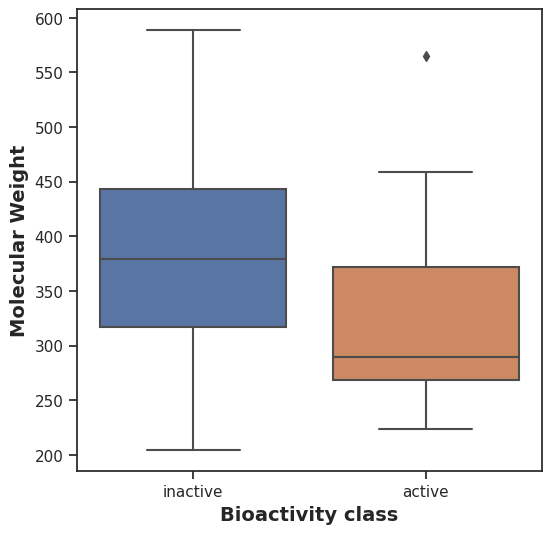

In [18]:
plt.figure(figsize = (6,6))

sns.boxplot(x='class', y = 'MW', data = df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Molecular Weight', fontsize=14, fontweight='bold')

plt.savefig('plot_mw_val.pdf')

In [17]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,249.0,0.023567,0.05,Different distribution (reject H0)


### log p 

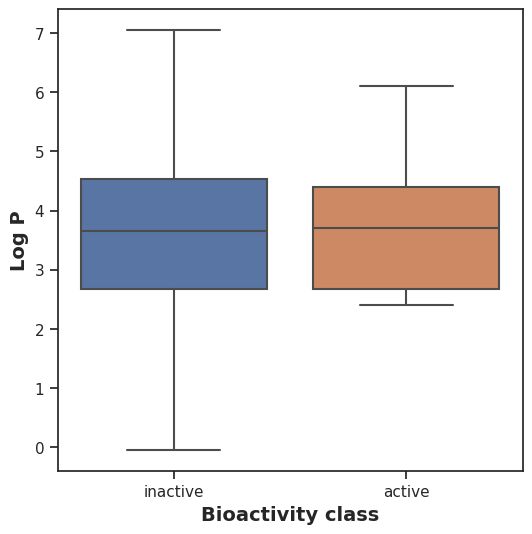

In [19]:
plt.figure(figsize = (6,6))

sns.boxplot(x='class', y = 'LogP', data = df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Log P', fontsize=14, fontweight='bold')

plt.savefig('plot_class_logp.pdf')

In [25]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,425.0,0.90798,0.05,Same distribution (fail to reject H0)


### NumHDonors

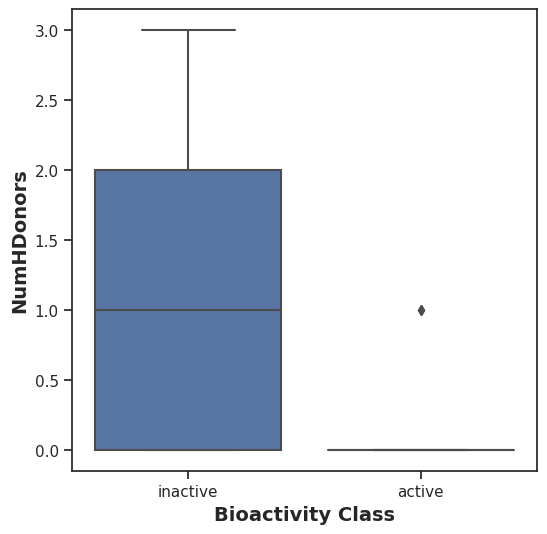

In [23]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'class', y = 'NumHDonors', data = df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_class_NumHDonors.pdf')

In [26]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,178.5,0.00062,0.05,Different distribution (reject H0)


### NumHAcceptors

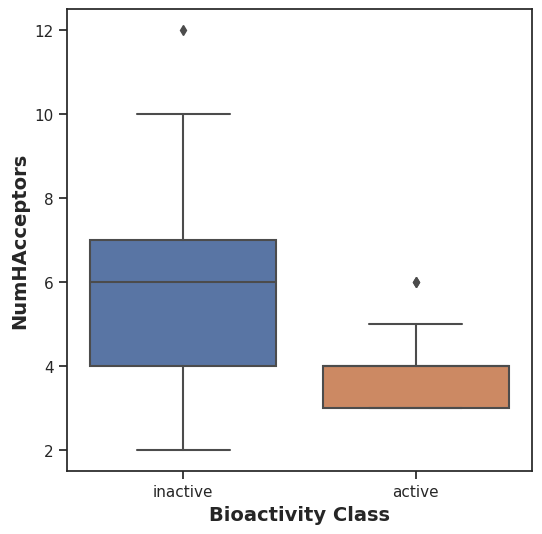

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x='class', y='NumHAcceptors', data=df)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_class_numhacceptors.pdf')

In [29]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,248.0,0.020964,0.05,Different distribution (reject H0)


## Interpretation of the statistical results

### pIC-50

Taking a look at pIC50 values, the actives and inactives displayed statistically significant 
difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 >
10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used 
to define actives and inactives.

### Rest all Lipinski's descriptors

Out of all of the 4 Lipinski's descriptors, all of the descriptors exhibited statistically significant difference between the actives and inactives. This is except in the case of Log P which showed no difference between the actives and the inactives. 

## That's it for now!! Thanks!!